In [1]:
from six.moves import cPickle as pickle

import sys
# reload(sys)
# sys.setdefaultencoding('utf-8')

import os as os
import fnmatch
import argparse
import pathlib
import time
import itertools

import numpy as np
if "DISPLAY" not in os.environ:
    mpl.use('Agg')
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import scipy.io as sio
import glob 

from scipy.stats import randint as sp_randint
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA, KernelPCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold  # k-fold cross validation StratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler  # data normalization
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier  # random forest model
from sklearn.pipeline import Pipeline # model pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import make_scorer


%reload_ext autoreload

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.rc('text', usetex=True)
plt.rc('font', family='times')

plt.rcParams.update({'font.size': 22})
# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%reload_ext autoreload
%autoreload 2



In [2]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [15]:
knownNames = glob.glob("../dataset/Dados_SONAR/[DEFH]*.mat")

knownNamesA1 = glob.glob("../dataset/Dados_SONAR/A1*.mat")
knownNamesB1 = glob.glob("../dataset/Dados_SONAR/B1*.mat")
knownNamesC1 = glob.glob("../dataset/Dados_SONAR/C1*.mat")
knownNamesG1 = glob.glob("../dataset/Dados_SONAR/G1*.mat")

knownNamesAux = glob.glob("../dataset/Dados_SONAR/[ABCG]*.mat")
knownNamesAux2 = knownNamesA1 + knownNamesB1 + knownNamesC1 + knownNamesG1

X_unknown = [x for x in knownNamesAux if x not in knownNamesAux2]

X_unknown = [sio.loadmat(x)['ent_norm'] for x in X_unknown]
print(len(X_unknown))

knownNames2 = knownNames + knownNamesA1+knownNamesB1+knownNamesC1+knownNamesG1

unknownNames = glob.glob("../dataset/Dados_SONAR/[ABCG]*.mat")

X = [sio.loadmat(x)['ent_norm'] for x in knownNames2]
Y = [(x.split('/')[-1][0]) for x in knownNames]

Y = ['A' if y=='D' else y for y in Y]
Y = ['A' if y=='E' else y for y in Y]
Y = ['A' if y=='F' else y for y in Y]
Y = ['A' if y=='H' else y for y in Y]

Y2 = ['B' for x in knownNamesAux2]

Y = Y + Y2
print(Y)

X2 = [sio.loadmat(x)['ent_norm'] for x in unknownNames]
# print(X)

le = LabelEncoder()
target = le.fit_transform(Y)

print(target)


78
['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [4]:
def increase_samples(data, wLength, ovSamples, label=None):
    
    y = []
    newLabel = []
    for counter, x in enumerate(data):
        size = np.shape(x)[0]
        beginWindowIndex = 0
        endWindowIndex = wLength
        if label is None:
            label2 = []
        else:    
            label2 = label[counter]
        
        while True:
            vector = np.reshape(x[beginWindowIndex:endWindowIndex,:], -1)
            y.append(vector)
            beginWindowIndex = beginWindowIndex + ovSamples
            endWindowIndex = endWindowIndex + ovSamples
            newLabel.append(label2)
            if endWindowIndex > size:
                break
            
    y = np.stack(y)
    return y, newLabel 

In [5]:
windowLength = 10
# xMatrixUnknown = np.stack([x[:minLength,:].reshape(-1) for x in X2])
# xMatrix2 = np.stack([x[:minLength,:].reshape(-1) for x in X2])


# print(xMatrix.shape)

# print(target.shape)
# # xMatrix = np.stack([x.reshape(-1) for x in X])


# # X_train, X_test, y_train, y_test = train_test_split(xMatrix, target, test_size=0.3, random_state=42)

# X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.3, random_state=42)

# print(X_train[0].shape)

# teste,label2 = increase_samples(X_train, 10, 1, y_train)


# # pca = PCA(10)
# # X_train = pca.fit_transform(X_train)
# # X_test = pca.fit_transform(X_test)

# model = Pipeline([('pca', PCA()), ('rf', RandomForestClassifier(random_state=42, class_weight='balanced'))])
# # model = Pipeline([ ('rf', RandomForestClassifier(random_state=42, class_weight='balanced'))])

# # model = Pipeline([('pca', PCA()), ('svm', svm.LinearSVC())])


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.3, random_state=42)


In [7]:
xMatrixTrainExtended,y_trainExtended = increase_samples(X_train, windowLength, 1, y_train)
# print(xMatrixTrainExtended.shape)
# print(xMatrix.shape)
# print(len(y_trainExtended))

In [8]:
model = Pipeline([('pca', PCA()), ('rf', RandomForestClassifier(random_state=42, class_weight='balanced'))])
# model = Pipeline([('reduce_dim', PCA()), ('rf', RandomForestClassifier(random_state=42, class_weight='balanced'))])


In [9]:
xMatrixTest = np.stack([x[:windowLength,:].reshape(-1) for x in X_test])


In [10]:
fold = StratifiedKFold(10)


In [11]:
# parameters = {'pca__n_components': [252], 'rf__n_estimators': [82], 'rf__n_jobs': [-1],
#               'rf__min_samples_leaf': [35], 'rf__criterion': ['gini']}
metric = metrics.make_scorer(metrics.accuracy_score)
# metric = metrics.make_scorer(metrics.precision_score, average='weighted')



parameters = {'pca__n_components': sp_randint(10, 500), 'rf__n_estimators': sp_randint(10, 100), 'rf__n_jobs': [-1],
              'rf__min_samples_leaf': sp_randint(1, 100), 'rf__criterion': ['gini']}


# parameters = {'pca__n_components': sp_randint(10, 200)}

gridsearchcv = RandomizedSearchCV(model, parameters, scoring=metric, cv=fold, n_iter=10)

print(xMatrixTrainExtended.shape)

# gridsearchcv = GridSearchCV(model, parameters, n_jobs=3, cv=fold, scoring=metric)
gridsearchcv.fit(xMatrixTrainExtended, y_trainExtended)

(12810, 5570)


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
          error_score='raise',
          estimator=Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('rf', RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_node...stimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False))]),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'pca__n_components': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f5148575190>, 'rf__criterion': ['gini'], 'rf__n_jobs': [-1], 'rf__n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f5118150310>, 'rf__min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f5118150390>},
          pr

In [12]:
gridsearchcv.cv_results_

/home/felipe/miniconda2/envs/siemens2.7/lib/python2.7/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/felipe/miniconda2/envs/siemens2.7/lib/python2.7/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/felipe/miniconda2/envs/siemens2.7/lib/python2.7/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_arg

{'mean_fit_time': array([  6.97911661,  12.61838021,   6.74044156,   4.53288238,
          2.34932117,   4.71549125,  10.3975935 ,   3.4858814 ,
          8.41426857,   8.53829556]),
 'mean_score_time': array([ 0.18419607,  0.23017552,  0.20332391,  0.17807233,  0.15450804,
         0.18138809,  0.22139714,  0.16766276,  0.19809899,  0.1959404 ]),
 'mean_test_score': array([ 0.93981265,  0.94301327,  0.93364559,  0.94176425,  0.94676034,
         0.94660422,  0.9442623 ,  0.94129586,  0.94933646,  0.94480874]),
 'mean_train_score': array([ 0.99550697,  0.99405842,  1.        ,  0.99504721,  0.99910659,
         0.99544623,  0.99511663,  0.99639168,  0.99443141,  0.9983086 ]),
 'param_pca__n_components': masked_array(data = [249 396 180 116 41 108 333 76 274 293],
              mask = [False False False False False False False False False False],
        fill_value = ?),
 'param_rf__criterion': masked_array(data = ['gini' 'gini' 'gini' 'gini' 'gini' 'gini' 'gini' 'gini' 'gini' 'gini'],


{'pca__n_components': 274, 'rf__n_jobs': -1, 'rf__criterion': 'gini', 'rf__n_estimators': 66, 'rf__min_samples_leaf': 87}
(array([ 0.93981265,  0.94301327,  0.93364559,  0.94176425,  0.94676034,
        0.94660422,  0.9442623 ,  0.94129586,  0.94933646,  0.94480874]), array([ 0.0416554 ,  0.04757854,  0.04671885,  0.05090827,  0.04485592,
        0.04719138,  0.05441044,  0.04661041,  0.04763135,  0.04362906]))
Confusion matrix, without normalization
[[4620  143]
 [ 368  351]]


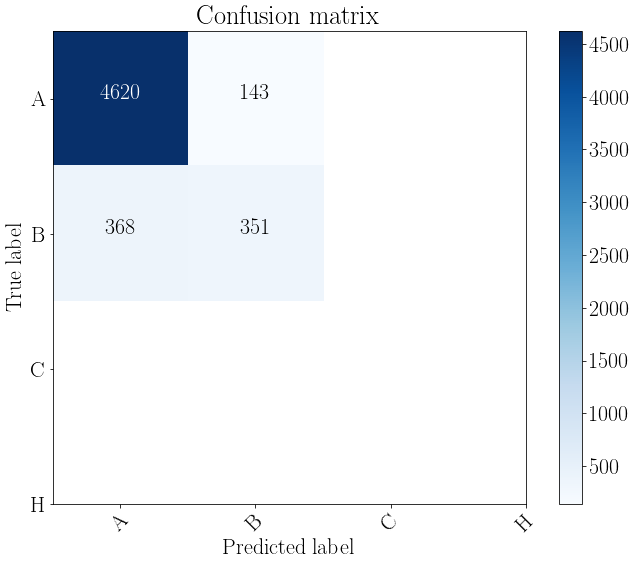

In [16]:
best_n_components = gridsearchcv.best_params_['pca__n_components']

xMatrixTestExtended,y_testExtended = increase_samples(X_test, windowLength, 1, y_test)
xMatrixUnknownExtended,_ = increase_samples(X_unknown, windowLength, 1)

print(gridsearchcv.best_params_)
means = gridsearchcv.cv_results_['mean_test_score']
stds = gridsearchcv.cv_results_['std_test_score']

print(means,stds)
# print(zip(gridsearchcv.best_estimator_.predict_proba(xMatrixTestExtended), np.array(y_testExtended)))
acc = metrics.accuracy_score(y_testExtended, gridsearchcv.best_estimator_.predict(xMatrixTestExtended))
F1 = metrics.f1_score(y_testExtended, gridsearchcv.best_estimator_.predict(xMatrixTestExtended), average='weighted')
prec = metrics.precision_score(y_testExtended, gridsearchcv.best_estimator_.predict(xMatrixTestExtended), average='weighted')

confusionMatrix = metrics.confusion_matrix(y_testExtended, gridsearchcv.best_estimator_.predict(xMatrixTestExtended))

plt.figure()
plot_confusion_matrix(confusionMatrix,normalize=False, classes=['A', 'B', 'C', 'H'])
# print(np.max(resultsTest,axis=1))


In [ ]:
resultsTestProb = gridsearchcv.best_estimator_.predict_proba(xMatrixTestExtended)
resultsTest = gridsearchcv.best_estimator_.predict(xMatrixTestExtended)
resultsTrainProb = gridsearchcv.best_estimator_.predict_proba(xMatrixTrainExtended)


# print(resultsTestProb)
# print()
resultsUnknown = gridsearchcv.best_estimator_.predict_proba(xMatrixUnknownExtended)

# print(resultsUnknown)

x = np.abs(resultsTest - y_testExtended)
# print(np.where(x !=0))

aux2 = np.array(resultsTestProb)
aux3 = np.array(y_testExtended)

indexA = (aux3 == 0) & (x == 0)
indexB = (aux3 == 1) & (x == 0)
indexC = (aux3 == 2) & (x == 0)
indexH = (aux3 == 3) & (x == 0)

# print(indexA)


acertos_A = resultsTestProb[indexA,0]
acertos_B = resultsTestProb[indexB,1]
acertos_C = resultsTestProb[indexC,2]
acertos_H = resultsTestProb[indexH,3]

index = np.where(x == 0)

print(len(index))

aux = aux2[np.where(x==0),aux3[np.where(x==0)]]
print(aux.shape)
plt.figure()
plt.hist(acertos_A, bins=50, facecolor='blue', alpha=0.75)
plt.show()

plt.figure()
plt.hist(acertos_B, bins=50, facecolor='blue', alpha=0.75)
plt.show()

plt.figure()
plt.hist(acertos_C, bins=50, facecolor='blue', alpha=0.75)
plt.show()

plt.figure()
plt.hist(acertos_H, bins=50, facecolor='blue', alpha=0.75)
plt.show()






resultsUnknown2 = resultsUnknown.reshape(-1)

plt.figure()
plt.hist(resultsUnknown2, 50, facecolor='blue', alpha=0.75)
plt.show()

print(resultsUnknown[:40,:])